In [1]:
%matplotlib notebook
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [3]:
def detrend(e):
    def butter_lowpass(cutoff, fs, order=5):
        nyq = 0.5 * fs
        normal_cutoff = cutoff / nyq
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        return b, a

    def butter_lowpass_filter(data, cutoff, fs, order=5):
        b, a = butter_lowpass(cutoff, fs, order=order)
        y = filtfilt(b, a, data)
        return y
    
    order = 4
    fs = 15
    cutoff = 1
    e = butter_lowpass_filter(e, cutoff, fs, order)
    
    return e

In [4]:
def Mark(diff_x):
    found = False
    start = -1
    l = []
    for i in range(diff_x.shape[0]):
        if(diff_x[i] == 0 and not found):
            found = True
            start = i
        elif(diff_x[i] == 1 and found):
            found = False
            end = i
            
            if(end - start > 50):
                l.append([start, end])
    return l

c:\users\mayank\appdata\local\conda\conda\envs\deep_learning\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


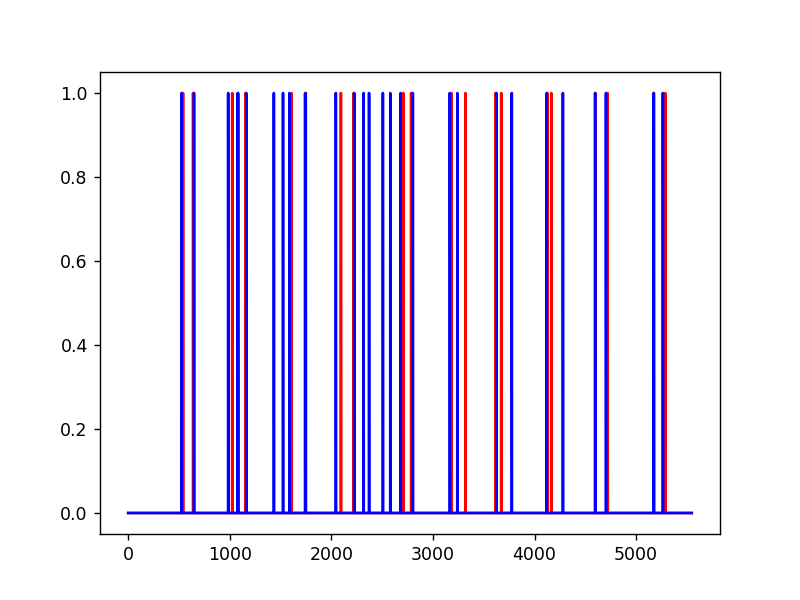

In [9]:
files = os.listdir("Data/Speech")
speech = np.load("Data/Speech/" + "s2.npy")
peak = np.load("Data/Peaks/" + "s2.npy")
e = detrend(speech)
# plt.plot(np.abs(speech) / np.max(np.abs(speech)))
plt.plot(peak, "r")
x = np.mean(np.abs(speech))
x = np.abs(speech) < 0.25 * np.max(np.abs(speech))
diff_x = np.diff(x)
l = Mark(diff_x)
y = np.zeros(x.shape[0])
for i in l:
    y[i[0]:i[1]] = 1
plt.plot(np.abs(np.diff(y)), "b")